In [2]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [8]:
pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [22]:
yfinance_data = pd.read_excel(r"C:\Users\Dell\OneDrive\Desktop\dump\RAG-based financial sentiment analysis\data\raw\yfinance_data.xlsx")

In [23]:
print(yfinance_data.head())

        Date         Open         High          Low        Close    Volume  \
0 2024-09-05  1513.007235  1519.705458  1481.134531  1487.035889  16264168   
1 2024-09-06  1486.562759  1491.044858  1455.810581  1458.997803  19394228   
2 2024-09-09  1460.666262  1464.077686  1449.809598  1456.632324   9010298   
3 2024-09-10  1454.690113  1466.194215  1451.776700  1455.711060  10768260   
4 2024-09-11  1457.230055  1462.907332  1441.791714  1445.725952   9760202   

   Dividends  Stock Splits      company  
0        0.0             0  RELIANCE.NS  
1        0.0             0  RELIANCE.NS  
2        0.0             0  RELIANCE.NS  
3        0.0             0  RELIANCE.NS  
4        0.0             0  RELIANCE.NS  


In [24]:
yfinance_data = yfinance_data.drop([ "Dividends", "Stock Splits"], axis = 1)

In [25]:
yfinance_data.head()

,Date,Open,High,Low,Close,Volume,company
0,2024-09-05,1513.007235,1519.705458,1481.134531,1487.035889,16264168,RELIANCE.NS
1,2024-09-06,1486.562759,1491.044858,1455.810581,1458.997803,19394228,RELIANCE.NS
2,2024-09-09,1460.666262,1464.077686,1449.809598,1456.632324,9010298,RELIANCE.NS
3,2024-09-10,1454.690113,1466.194215,1451.776700,1455.711060,10768260,RELIANCE.NS
4,2024-09-11,1457.230055,1462.907332,1441.791714,1445.725952,9760202,RELIANCE.NS


In [26]:
yfinance_data.shape

(2510, 7)

In [27]:
TICKERS = [          
    "RELIANCE.NS",    
    "HDFCBANK.NS",    
    "BHARTIARTL.NS",  
    "TCS.NS",         
    "ICICIBANK.NS",   
    "SBIN.NS",        
    "HINDUNILVR.NS",  
    "INFY.NS",        
    "BAJFINANCE.NS",  
    "LICI.NS"         
]

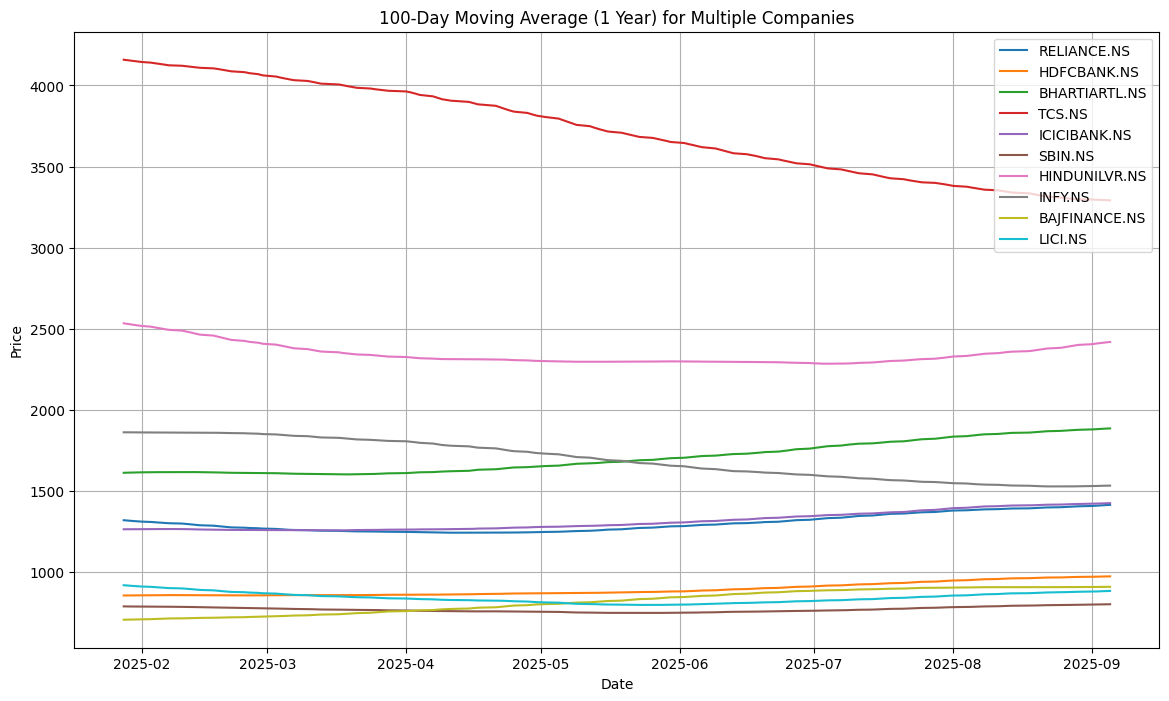

In [29]:
yfinance_data["Date"] = pd.to_datetime(yfinance_data["Date"])
plt.figure(figsize=(14, 8))
for company in yfinance_data["company"].unique():
    df = yfinance_data[yfinance_data["company"] == company].copy()
    df.set_index("Date", inplace=True)
    df["100DMA"] = df["Close"].rolling(window=100).mean()
    plt.plot(df.index, df["100DMA"], label=f"{company}")

plt.title("100-Day Moving Average (1 Year) for Multiple Companies")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
yfinance_data

,Date,Open,High,Low,Close,Volume,company,100DMA
0,2024-09-05,1513.007235,1519.705458,1481.134531,1487.035889,16264168,RELIANCE.NS,NaN
1,2024-09-06,1486.562759,1491.044858,1455.810581,1458.997803,19394228,RELIANCE.NS,NaN
2,2024-09-09,1460.666262,1464.077686,1449.809598,1456.632324,9010298,RELIANCE.NS,NaN
3,2024-09-10,1454.690113,1466.194215,1451.776700,1455.711060,10768260,RELIANCE.NS,NaN
4,2024-09-11,1457.230055,1462.907332,1441.791714,1445.725952,9760202,RELIANCE.NS,NaN
...,...,...,...,...,...,...,...,...
2505,2025-09-01,853.799988,864.950012,852.150024,859.150024,784731,LICI.NS,880.034809
2506,2025-09-02,863.349976,868.849976,856.000000,864.150024,500854,LICI.NS,880.931010
2507,2025-09-03,868.450012,872.950012,865.950012,870.700012,648680,LICI.NS,882.061472
2508,2025-09-04,910.000000,910.000000,873.349976,878.099976,2687918,LICI.NS,883.232872
